# Keras RNN Experimentation

The notebook is intended to experiment with Keras and RNN in order to implement a Time Series Forecast

# Setup Notebook

## Imports

In [1]:
# Import Standard Libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import seasonal_decompose
# from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator

ModuleNotFoundError: No module named 'tensorflow'

## Read Data

In [2]:
# Read data from .CSV file
sales = pd.read_csv('./../../data/raw/alcohol_sales.csv', index_col=0, parse_dates=True)
sales.columns = ['Sales']

# Exploratory Data Analysis

## Time Series Plot

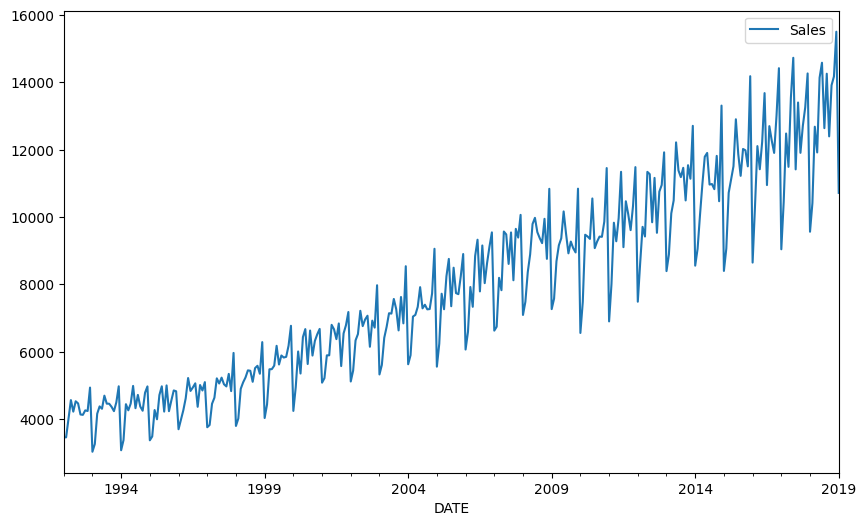

In [3]:
# Plot time series
_ = sales.plot(figsize=(10, 6))

- There are strong evidences of Trend and Seasonality components

## ETS Decomposition

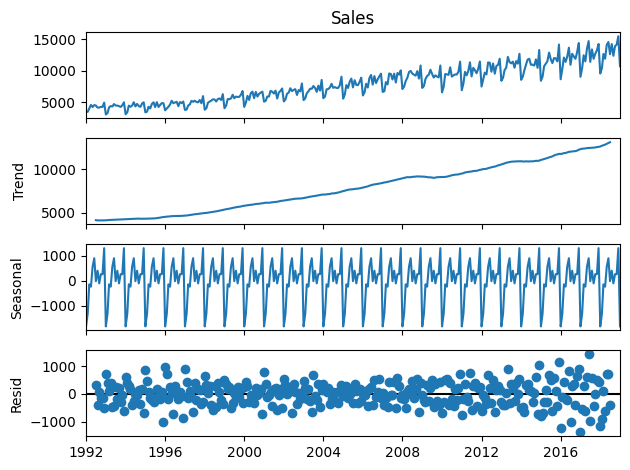

In [4]:
# Perform ETS decomposition
ets = seasonal_decompose(sales['Sales'])
_ = ets.plot()

- There are Trend and seasonality components

### Seasonality

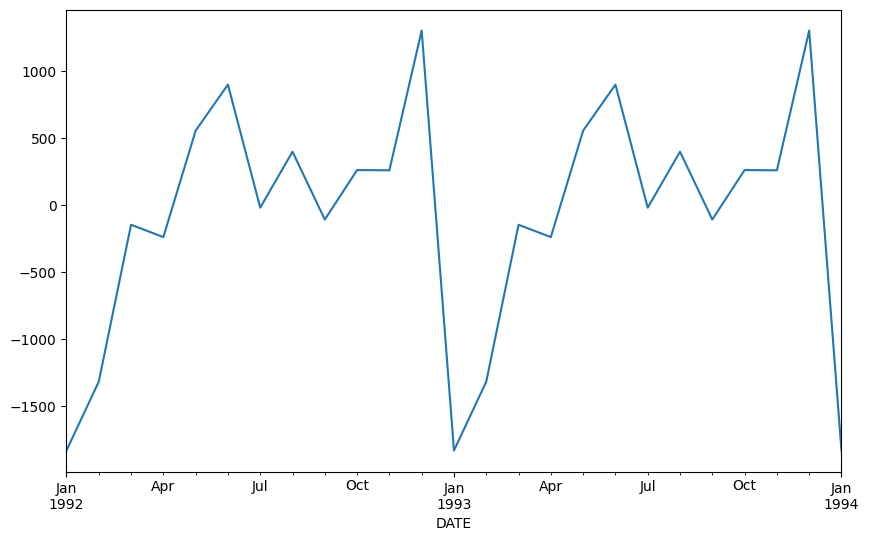

In [5]:
# Explore seasonality component
_ = ets.seasonal['1992-01-01':'1994-01-01'].plot(figsize=(10, 6))

- It is a yearly seasonality

# Data Preparation

## Train & Test Split

In [6]:
# Compute dimension of test set
test_size = len(sales) - 12

# Perform the split
sales_train = sales.iloc[:test_size]
sales_test = sales.iloc[test_size:]

## Normalisation

In [7]:
# Define scaler
scaler = MinMaxScaler()

# Fit the scaler
scaler.fit(sales_train)

# Transform
sales_train_scaled = scaler.transform(sales_train)
sales_test_scaled = scaler.transform(sales_test)